In [18]:

from skimage import io, color, filters
from skimage import io, transform
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import keras_ocr
from skimage.morphology import erosion, dilation, opening, closing, skeletonize
import cv2
from skimage.filters import gaussian
from skimage.util import invert

### 
class ImageMod:
    ##
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = np.array(Image.open(self.image_path))
        
    ## 
    def gaussian_blur(self, sigma):        
        self.blurred = filters.gaussian(self.image, sigma=(sigma, sigma), truncate=3.5, channel_axis=-1)

    ## 
    def display_blur(self):
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(self.image)
        plt.title("Original Image")
        
        plt.subplot(1, 2, 2)
        plt.imshow(self.blurred)
        plt.title("blurred image")
        plt.show()

    ## 
    def binarize_image(self, input_image):   
       
        #self.image = image.rotate(90, expand=True)
        # Convert the image to grayscale
        gray_image = color.rgb2gray(input_image)
        # Apply Otsu's thresholding
        threshold_value = filters.threshold_otsu(gray_image)
        self.binary_image = gray_image > threshold_value
    
    def display_binary(self,save_path):
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(self.image)
        plt.title("Original Image")
        
        plt.subplot(1, 2, 2)
        plt.imshow(self.binary_image, cmap='gray')
        plt.title("Otsu's Thresholded Image")
        plt.savefig(save_path)
        plt.show()
    
    def crop(self,y1, y2, x1, x2, save_path):
        self.crop = self.binary_image[y1:y2, x1:x2]
        self.crop_numeric = self.crop.astype(np.uint8) * 255
        mpimg.imsave(save_path, self.crop_numeric, cmap='gray')        

    def display_crop(self):
        plt.imshow(self.crop_numeric, cmap='gray')
        plt.show()
    
    def transform(self, what_to_transform, type = 'straight'):
        self.what_to_transform = what_to_transform
        if type == 'straight':
            # Find the angle of rotation to straighten the text
            coords = np.column_stack(np.where(self.what_to_transform))
            angle = np.arctan2(coords[:, 0].std(), coords[:, 1].std())
            # Rotate the binary image to straighten the text
            self.straightened_text_array = transform.rotate(self.what_to_transform, np.degrees(angle/3), cval=1)
            # Display the original and straightened images (optional)
    
    def show_transform(self):
        plt.subplot(1, 2, 1)
        plt.imshow(self.what_to_transform, cmap='gray')
        plt.title('Original Image')
        mpimg.imsave('before.png', self.what_to_transform, cmap='gray')   
        ## -- 
        plt.subplot(1, 2, 2)
        plt.imshow(self.straightened_text_array, cmap='gray')
        plt.title('Straightened Image')
        mpimg.imsave('after.png', self.straightened_text_array, cmap = 'gray')
        plt.show()
    
    ## add dilation and erosion over here... 
    def im_erosion(self,image, n):
        kernel = np.array([[0,1,0],
                     [1,1,1],
                     [0,1,0]])
        for i in range(n):
            image = erosion(image, kernel)
        self.dilated = image

    def show_eroded(self):
        plt.title('bolder text using erosion')
        plt.imshow(self.dilated, cmap='gray')
        plt.show()    
    
    def detect_edges(self):
        edges = cv2.Canny(self.crop_numeric, 50, 150, apertureSize=3)
        # Display the edges
        plt.imshow(edges)
        plt.show()

    def skeletonize(self, input_img):
        #self.inverted = invert(input_img)
        self.skeleton = skeletonize(input_img)

    def show_skeleton(self):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

        ax = axes.ravel()
        
        ax[0].imshow(self.binary_image, cmap=plt.cm.gray)
        ax[0].axis('off')
        ax[0].set_title('inverted', fontsize=20)
        
        ax[1].imshow(self.skeleton, cmap=plt.cm.gray)
        ax[1].axis('off')
        ax[1].set_title('skeleton', fontsize=20)
        
        fig.tight_layout()
        plt.show()
        
    def predict(self, pics):
        self.img_array = pics.split(',')
        pipeline = keras_ocr.pipeline.Pipeline() 
        images = [
            keras_ocr.tools.read(img) for img in self.img_array
        ]
        # Each list of predictions in prediction_groups is a list of
        # (word, box) tuples.
        prediction_groups = pipeline.recognize(images)
        # Plot the predictions
        fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
        for ax, image, predictions in zip(axs, images, prediction_groups):
            keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
        
    

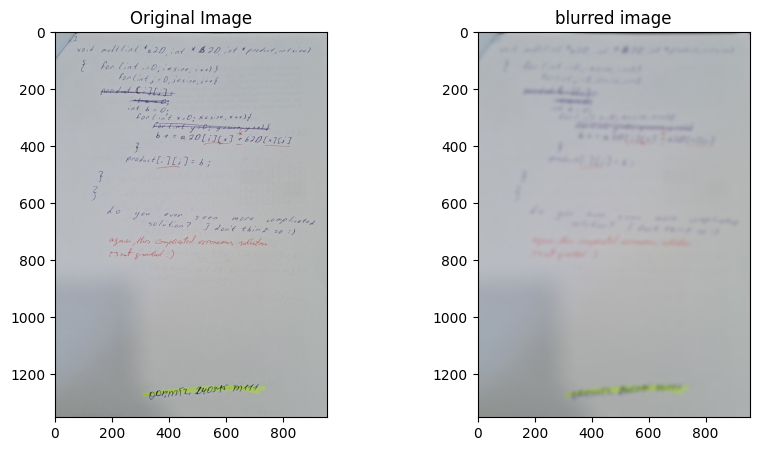

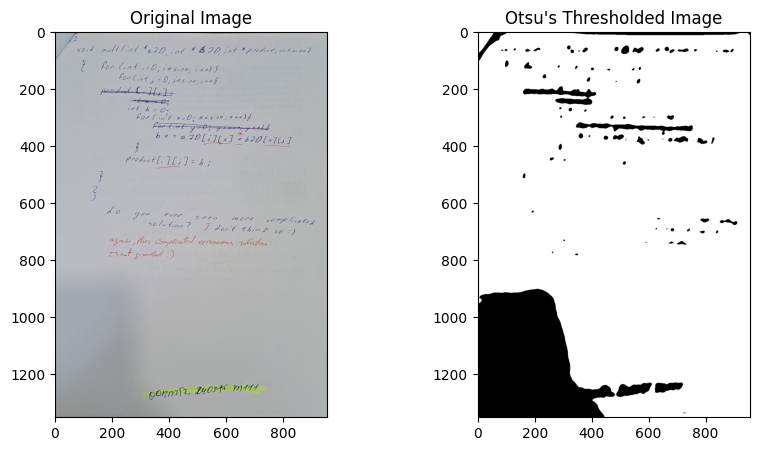

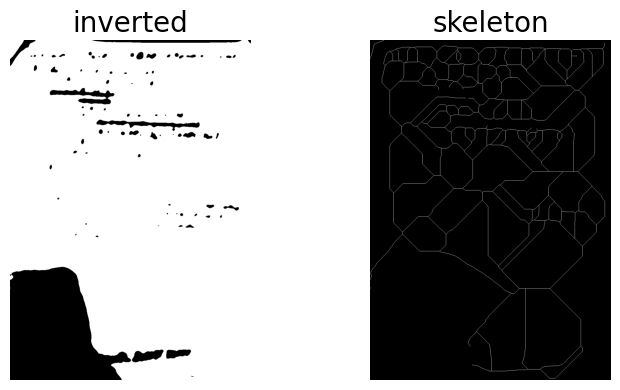

In [20]:
model = ImageMod('M109_M111_021.jpg')
model.gaussian_blur(6.0)
model.display_blur()
model.binarize_image(model.blurred)
model.display_binary('newin.jpg')
model.skeletonize(model.binary_image)
model.show_skeleton()

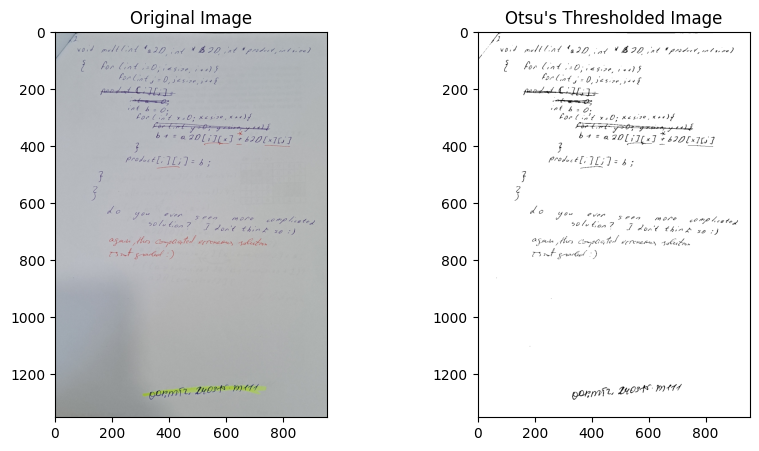

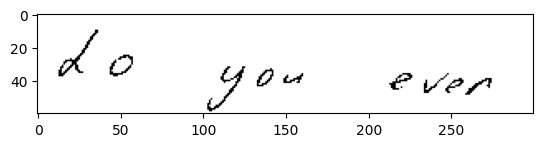

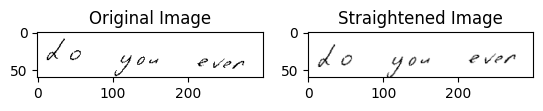

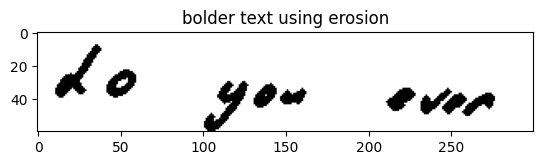

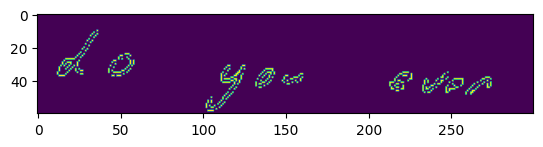

In [2]:
model = ImageMod('M109_M111_021.jpg')
model.binarize_image()
model.display('output_binary.png')
model.crop(600,660,170,470, 'crop_4.png')
model.display_crop()
model.transform(model.crop_numeric)
model.show_transform()
model.im_erosion(model.crop_numeric, 2)
model.show_eroded()
model.detect_edges()

Looking for C:\Users\Artur\.keras-ocr\craft_mlt_25k.h5

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.

Looking for C:\Users\Artur\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


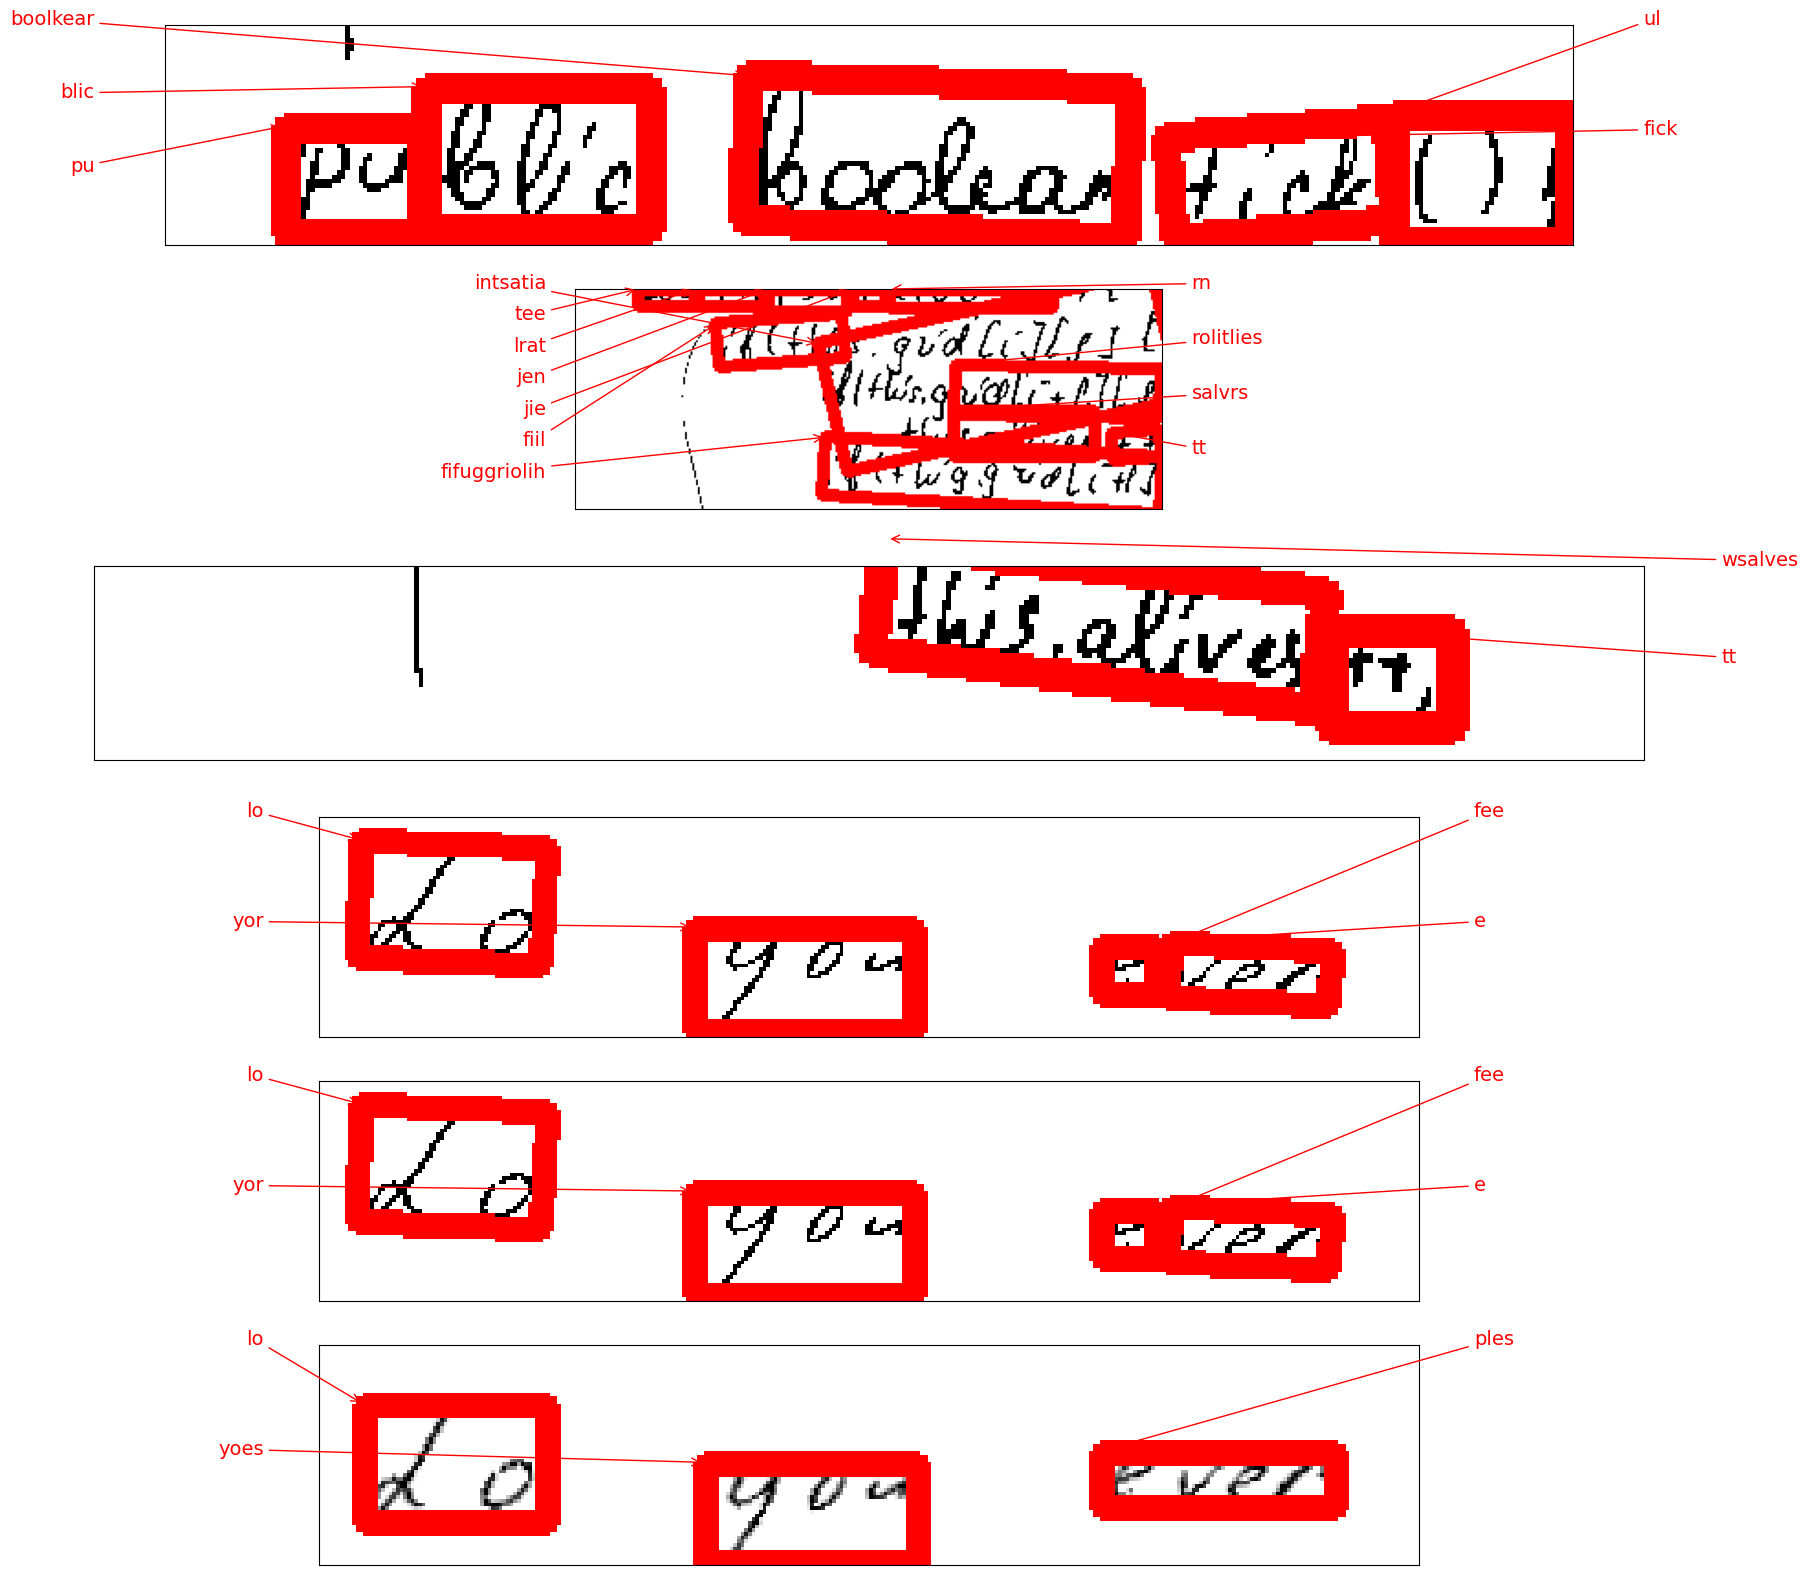

In [5]:
### 
model.predict('crop.png,crop2.png,crop3.png,crop_4.png,before.png,after.png')
plt.savefig('results.png')